#ML4Net - Lab 3

## Team members

Jan Sapé Rivero (266912) | Biel Domingo Grifell (268636) | Francesc Xarrie (266708)

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

1. Connect your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [ ]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl

--2025-06-04 16:37:48--  https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasetLab3.pkl.1’

datasetLab3.pkl.1       [ <=>                ] 177.37K  --.-KB/s    in 0.05s   

2025-06-04 16:37:48 (3.52 MB/s) - ‘datasetLab3.pkl.1’ saved [181622]



3. Define the main path of the code

In [ ]:
mypath="/content/drive/MyDrive/AAX/Lab3"

4. Extract the source code to the destination folder

In [ ]:
cd $mypath

/content/drive/MyDrive/AAX/Lab3


## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [ ]:
import pickle
import os

print(os.getcwd())
print(os.path.exists('datasetLab3.pkl'))

# Open and load the pickle file
try:
    with open('datasetLab3.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/content
False
Error: 'datasetLab3.pkl' not found.


--2025-06-04 14:40:41--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/master/files/datasetLab3.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7178423 (6.8M) [application/octet-stream]
Saving to: ‘datasetLab3.pkl.1’

datasetLab3.pkl.1   100%[===================>]   6.85M  --.-KB/s    in 0.09s   

2025-06-04 14:40:41 (76.2 MB/s) - ‘datasetLab3.pkl.1’ saved [7178423/7178423]

/content/drive/MyDrive/AAX/Lab3
/content/drive/MyDrive/AAX/Lab3
True
An error occurred: invalid load key, '\x0a'.
This might still be an issue with the file contents. Try downloading the file manually and uploading.


## EXERCISES

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



Available APs: ['7-1012' '7-1013' '7-1021' '7-1043' '7-1019' '7-1071' '7-1113' '7-1048'
 '7-1101' '7-1026' '7-1129' '7-112' '7-100' '7-111' '7-1030' '7-1117'
 '7-1126' '7-1099' '7-1052' '7-1087' '7-108' '7-1022' '7-1018' '7-1059'
 '7-1054' '7-110' '7-1058' '7-1094' '7-1064' '7-102' '7-1044' '7-1002'
 '7-1096' '7-1014' '7-1082' '7-1088' '7-1106' '7-1063' '7-1114' '7-1137'
 '7-1004' '7-1045' '7-1125' '7-1036' '7-1124' '7-1034' '7-1083' '7-1072'
 '7-1033' '7-1069' '7-1127' '7-1005' '7-1130' '7-1047' '7-1020' '7-1066'
 '7-1039' '7-1134' '7-1003' '7-1120' '7-1131' '7-1009' '7-1084' '7-1074'
 '7-1062' '7-1025' '7-1089' '7-1098' '7-1006' '7-1139' '7-10' '7-1133'
 '7-1060' '7-1032' '7-106' '7-1057' '7-101' '7-1102' '7-1085' '7-1053'
 '7-107' '7-1121' '7-1023' '7-1097' '7-1050' '7-1037' '7-11' '7-1136'
 '7-1040' '7-1015' '7-1079' '7-1065' '7-1104' '7-105' '7-103' '7-1100'
 '7-1056' '7-1051' '7-114' '7-104']


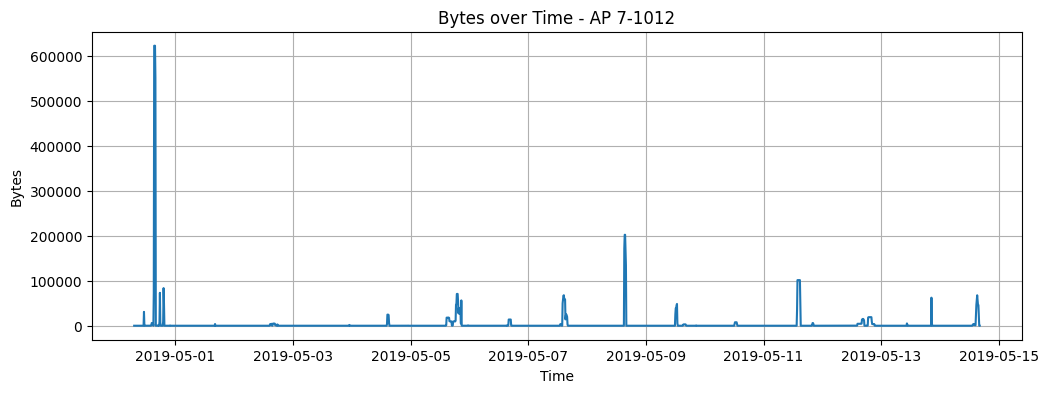

<Figure size 1000x400 with 0 Axes>

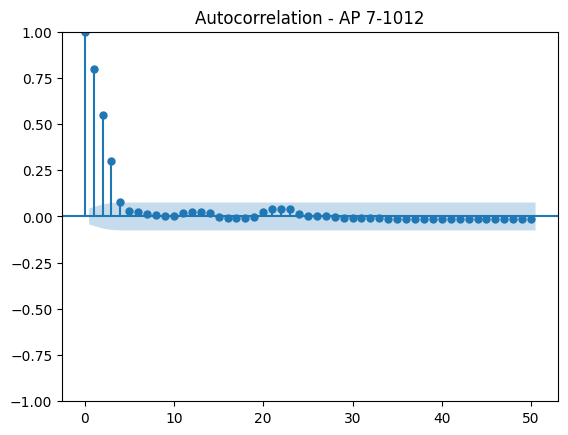


ADF Test for AP 7-1012
Test Statistic: -8.010830846299886
P-value: 2.2037624493905606e-12
Critical Values:
   1%: -3.4335517248444334
   5%: -2.8629543667432555
   10%: -2.567522945522803
→ Likely stationary (reject H0)


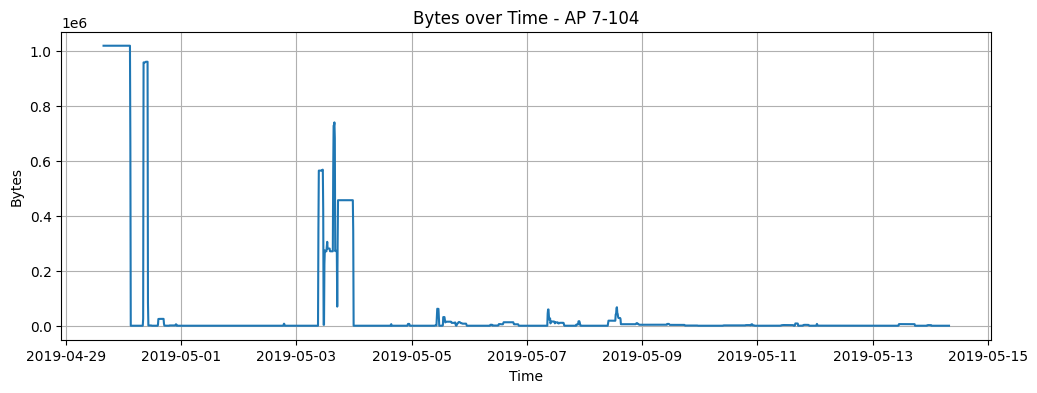

<Figure size 1000x400 with 0 Axes>

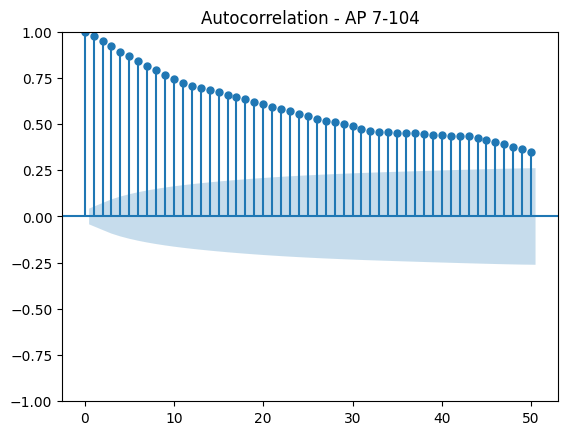


ADF Test for AP 7-104
Test Statistic: -5.85061396572009
P-value: 3.5966825072785737e-07
Critical Values:
   1%: -3.4334842047036167
   5%: -2.8629245552811486
   10%: -2.5675070726005353
→ Likely stationary (reject H0)


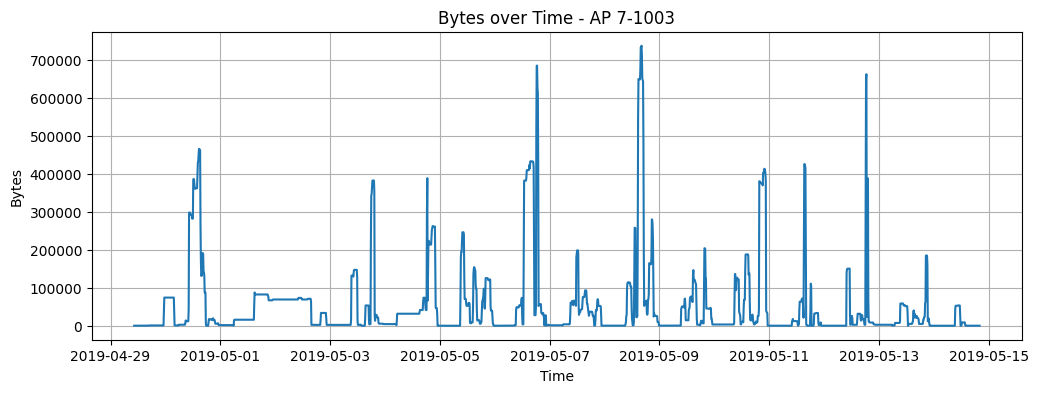

<Figure size 1000x400 with 0 Axes>

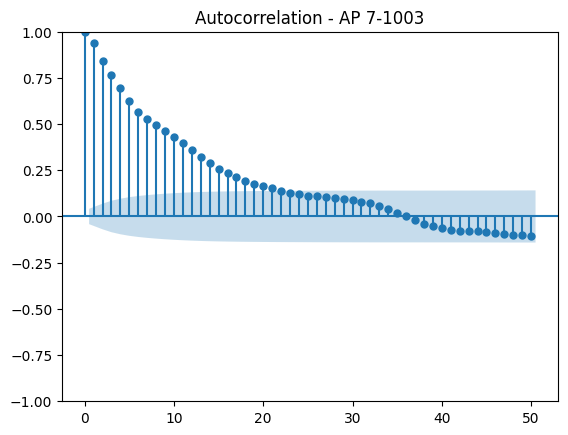


ADF Test for AP 7-1003
Test Statistic: -8.676131800960338
P-value: 4.4112497444884645e-14
Critical Values:
   1%: -3.4333083829182174
   5%: -2.8628469233690756
   10%: -2.567465738507758
→ Likely stationary (reject H0)


In [ ]:
# (response to exercise 1)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

df.index = pd.to_datetime(df.index)
print("Available APs:", df['AP ID'].unique())

# Select 2–3 APs with potentially different characteristics
selected_aps = ['7-1012', '7-104', '7-1003'] # Replace with actual AP IDs of interest
for ap_id in selected_aps:
    ap_df = df[df['AP ID'] == ap_id]
    series = ap_df['Bytes']  # Or 'Active Connections' if preferred
    series = series.dropna()

    # Plot 1: Line plot
    plt.figure(figsize=(12, 4))
    plt.plot(series)
    plt.title(f"Bytes over Time - AP {ap_id}")
    plt.xlabel("Time")
    plt.ylabel("Bytes")
    plt.grid(True)
    plt.show()

    # Plot 2: Autocorrelation
    plt.figure(figsize=(10, 4))
    plot_acf(series, lags=50)
    plt.title(f"Autocorrelation - AP {ap_id}")
    plt.show()

    # Test 3: ADF Test
    result = adfuller(series)
    print(f"\nADF Test for AP {ap_id}")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print("→ Likely stationary (reject H0)")
    else:
        print("→ Likely non-stationary (fail to reject H0)")


Access Point 7-1012 shows a relatively quiet behavior with most of the time series staying close to zero, interrupted occasionally by strong, isolated spikes in data usage. These sharp increases may indicate brief but intense periods of activity, possibly due to short-term events like downloads or specific user actions. Overall, there is no clear upward or downward trend, nor any repeating pattern over time. This suggests a lack of seasonality or long-term trend in the usage behavior. The autocorrelation plot for AP 7-1012 confirms that there is not much correlation between time points, especially as the lag increases. The first few lags show some correlation, but it quickly decays to near zero. This rapid drop implies that the series is not highly dependent on past values, which is consistent with the sudden and irregular spikes seen in the line plot. The Augmented Dickey-Fuller (ADF) test result supports the idea that this time series is stationary. The very low p-value and a test statistic significantly below all critical values allow us to reject the null hypothesis of non-stationarity. This means that the statistical properties, like the mean and variance, are stable over time despite the irregular bursts of traffic.

AP 7-104 presents a very different pattern. Its time series begins with a few extremely high values that dominate the early part of the plot, followed by a noticeable drop and a more stable but still somewhat spiky usage pattern. These initial peaks might be anomalies or related to unusual events. After that, the series seems to settle into a lower, more consistent range of activity, although occasional bursts still occur. The autocorrelation plot for AP 7-104 is very different from that of AP 7-1012. It shows a slow and steady decline, which suggests strong persistence over time. In other words, values in the series are closely related to their recent past, and this relationship gradually fades as the lag increases. This kind of behavior often hints at underlying patterns, trends, or cycles, even though the trend might not be visually obvious in the line plot due to the dominating early spikes.The ADF test for AP 7-104 again indicates stationarity. Although the time series appears less stable at the beginning, the overall statistical properties seem to remain consistent enough across the period to pass the stationarity test. It’s worth noting, however, that the high initial values may still influence modeling and should possibly be treated as outliers depending on context.

Finally, AP 7-1003 shows the most regular and busy pattern of the three. The line plot has a lot of variation and consistent activity throughout the full time period, with frequent medium-to-large spikes in byte usage. This reflects an environment where data traffic is actively fluctuating and where multiple users or devices might be contributing to regular usage changes.The autocorrelation plot for AP 7-1003 exhibits a smooth, gradually decreasing trend, which is typical for time series with strong temporal dependencies. This means that the usage at one time is a good predictor of usage in the near future, making it more predictable compared to AP 7-1012. Such behavior suggests the presence of some underlying regularity, possibly due to repeated user behavior, usage patterns, or scheduled activities.As with the other two APs, the ADF test for AP 7-1003 also confirms stationarity. Despite the visual complexity of the time series, the mean and variance appear stable over time, making it suitable for time series modeling. The result shows a very low p-value and a test statistic far below the critical values, which strongly supports rejecting the null hypothesis of non-stationarity.

In summary, these three APs show clearly different behaviors: AP 7-1012 is mostly quiet with occasional bursts, AP 7-104 is dominated by a few extreme values followed by low activity, and AP 7-1003 is consistently dynamic with a strong temporal pattern. All three pass the ADF test, meaning they can be considered stationary and appropriate for modeling using standard time series techniques.

### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

In [ ]:
# (response to exercise 2)
import numpy as np

def create_sliding_windows(series, To, Tp):
    """
    Converts a univariate time series into sliding window input-output pairs.

    Parameters:
    - series: 1D array-like (list, NumPy array, or pd.Series)
    - To: observation window size (number of input time steps)
    - Tp: prediction window size (number of output time steps)

    Returns:
    - X: numpy array of shape (n_samples, To)
    - Y: numpy array of shape (n_samples, Tp)
    """
    series = np.array(series)
    X, Y = [], []

    total_length = len(series)
    for i in range(total_length - To - Tp + 1):
        x_i = series[i:i+To]
        y_i = series[i+To:i+To+Tp]
        X.append(x_i)
        Y.append(y_i)

    return np.array(X), np.array(Y)


### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [ ]:
# (response to exercise 3)
def split_time_series(X, Y, train_ratio, val_ratio):
    """
    Splits X and Y into train, validation, and test sets chronologically.

    Parameters:
    - X: np.array, shape (samples, features)
    - Y: np.array, shape (samples, targets)
    - train_ratio: float, portion for training
    - val_ratio: float, portion for validation

    Returns:
    - (X_train, Y_train), (X_val, Y_val), (X_test, Y_test)
    """
    total = len(X)
    train_end = int(total * train_ratio)
    val_end = int(total * (train_ratio + val_ratio))

    X_train, Y_train = X[:train_end], Y[:train_end]
    X_val, Y_val = X[train_end:val_end], Y[train_end:val_end]
    X_test, Y_test = X[val_end:], Y[val_end:]

    return (X_train, Y_train), (X_val, Y_val), (X_test, Y_test)


### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

We will define an LSTM model using PyTorch. LSTMs are specifically designed to handle sequential data with temporal dependencies, so they are good for time series forecasting tasks like predicting future WiFi load. Unlike basic feedforward networks, LSTMs can learn from patterns over time, remembering important context across previous steps, which is essential when the prediction depends on past behavior across multiple timesteps.LSTMs also handle irregular patterns and long-range dependencies better than simpler RNNs, while being less resource-intensive and complex than full Transformer-based models — which might be excessive for short prediction windows and relatively small datasets like individual AP traces.

In [ ]:
# (response to exercise 4)
import torch
import torch.nn as nn

class LSTMForecaster(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, Tp=2):
        super(LSTMForecaster, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, Tp)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)
        out, _ = self.lstm(x)
        # Take only last output in the sequence
        out = out[:, -1, :]  # shape: (batch_size, hidden_size)
        out = self.fc(out)   # shape: (batch_size, Tp)
        return out


### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

In [ ]:
# (response to exercise 5)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

To = 10  # observation window
Tp = 2   # prediction window

def normalize_series(series):
    mean = np.mean(series)
    std = np.std(series) if np.std(series) > 0 else 1
    return (series - mean) / std, mean, std

def create_sliding_windows(series, To=10, Tp=2):
    X, Y = [], []
    for i in range(len(series) - To - Tp + 1):
        X.append(series[i:i+To])
        Y.append(series[i+To:i+To+Tp])
    return np.array(X), np.array(Y)

# Prepare all data centrally
X_all, Y_all = [], []
means_stds = {}

for ap_id in df['AP ID'].unique():
    ap_df = df[df['AP ID'] == ap_id]
    series = ap_df['Bytes'].values
    norm_series, mean, std = normalize_series(series)
    X, Y = create_sliding_windows(norm_series, To, Tp)

    if len(X) > 0:
        X_all.append(X)
        Y_all.append(Y)
        means_stds[ap_id] = (mean, std)

X_all = np.concatenate(X_all)
Y_all = np.concatenate(Y_all)

# Split data (time-aware)
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = split_time_series(X_all, Y_all, train_ratio=0.8, val_ratio=0.1)

X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
Y_train_t = torch.tensor(Y_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)
Y_val_t = torch.tensor(Y_val, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
Y_test_t = torch.tensor(Y_test, dtype=torch.float32)

# Define and train LSTM
model = LSTMForecaster(input_size=1, hidden_size=64, num_layers=2, Tp=Tp)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_t)
    loss = criterion(output, Y_train_t)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(X_val_t), Y_val_t).item()
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss:.4f}")

# Evaluation on test set
model.eval()
with torch.no_grad():
    preds = model(X_test_t).numpy()

# De-normalize predictions and targets (approximate using average mean/std)
mean_all = np.mean([m for m, s in means_stds.values()])
std_all = np.mean([s for m, s in means_stds.values()])
preds_denorm = preds * std_all + mean_all
Y_test_denorm = Y_test * std_all + mean_all

# Compute evaluation metrics
mse = mean_squared_error(Y_test_denorm, preds_denorm)
mae = mean_absolute_error(Y_test_denorm, preds_denorm)
mape = np.mean(np.abs((Y_test_denorm - preds_denorm) / (Y_test_denorm + 1e-8))) * 100

print(f"Centralized Evaluation Metrics:")
print(f"  MSE  = {mse:.4f}")
print(f"  MAE  = {mae:.4f}")
print(f"  MAPE = {mape:.2f}%")


NameError: name 'df' is not defined

In [ ]:
import copy
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, mean_absolute_error


###Result not
# Assuming df, To=10, Tp=2, normalize_series(), create_sliding_windows(), LSTMForecaster are defined

# 1. Prepare client data: sliding windows + normalization per AP
client_data = {}
for ap_id in df['AP ID'].unique():
    ap_df = df[df['AP ID'] == ap_id]
    series = ap_df['Bytes'].values
    if len(series) < To + Tp:
        continue
    mean = np.mean(series)
    std = np.std(series) if np.std(series) > 0 else 1
    norm_series = (series - mean) / std
    X, Y = create_sliding_windows(norm_series, To, Tp)
    if len(X) > 0:
        client_data[ap_id] = {
            "X": torch.tensor(X, dtype=torch.float32).unsqueeze(-1),
            "Y": torch.tensor(Y, dtype=torch.float32),
            "mean": mean,
            "std": std
        }

# 2. Local training function (one epoch per client per round)
def train_local(model, X, Y, epochs=1, lr=0.001):
    local_model = copy.deepcopy(model)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(local_model.parameters(), lr=lr)
    local_model.train()
    for _ in range(epochs):
        optimizer.zero_grad()
        output = local_model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
    return local_model.state_dict()

# 3. Federated averaging of weights
def average_weights(w_list):
    avg = copy.deepcopy(w_list[0])
    for key in avg.keys():
        for w in w_list[1:]:
            avg[key] += w[key]
        avg[key] = avg[key] / len(w_list)
    return avg

# 4. Initialize global model
global_model = LSTMForecaster(input_size=1, hidden_size=64, num_layers=2, Tp=Tp)

# 5. Federated training loop
rounds = 5
for r in range(rounds):
    local_weights = []
    print(f"\n🌐 Federated Round {r+1}/{rounds}")
    for ap_id, data in client_data.items():
        weights = train_local(global_model, data["X"], data["Y"], epochs=1)
        local_weights.append(weights)
        print(f"✔️ Client {ap_id} trained")
    # Aggregate local weights to update global model
    global_model.load_state_dict(average_weights(local_weights))

# 6. Evaluate global model on all clients
global_model.eval()
mse_list, mae_list, mape_list = [], [], []
for ap_id, data in client_data.items():
    X, Y = data["X"], data["Y"]
    mean, std = data["mean"], data["std"]
    with torch.no_grad():
        preds = global_model(X).numpy()
        true = Y.numpy()
    # De-normalize predictions and true values
    preds = preds * std + mean
    true = true * std + mean
    mse_list.append(mean_squared_error(true, preds))
    mae_list.append(mean_absolute_error(true, preds))
    mape_list.append(np.mean(np.abs((true - preds) / (true + 1e-5))) * 100)

print("\n📊 Federated Model Evaluation (averaged across clients):")
print(f"MSE  = {np.mean(mse_list):.4f}")
print(f"MAE  = {np.mean(mae_list):.4f}")
print(f"MAPE = {np.mean(mape_list):.2f}%")



🌐 Federated Round 1/5
✔️ Client 7-1012 trained
✔️ Client 7-1013 trained
✔️ Client 7-1021 trained
✔️ Client 7-1043 trained
✔️ Client 7-1019 trained
✔️ Client 7-1071 trained
✔️ Client 7-1113 trained
✔️ Client 7-1048 trained
✔️ Client 7-1101 trained
✔️ Client 7-1026 trained
✔️ Client 7-1129 trained
✔️ Client 7-112 trained
✔️ Client 7-100 trained
✔️ Client 7-111 trained
✔️ Client 7-1030 trained
✔️ Client 7-1117 trained
✔️ Client 7-1126 trained
✔️ Client 7-1099 trained
✔️ Client 7-1052 trained
✔️ Client 7-1087 trained
✔️ Client 7-108 trained
✔️ Client 7-1022 trained
✔️ Client 7-1018 trained
✔️ Client 7-1059 trained
✔️ Client 7-1054 trained
✔️ Client 7-110 trained
✔️ Client 7-1058 trained
✔️ Client 7-1094 trained
✔️ Client 7-1064 trained
✔️ Client 7-102 trained
✔️ Client 7-1044 trained
✔️ Client 7-1002 trained
✔️ Client 7-1096 trained
✔️ Client 7-1014 trained
✔️ Client 7-1082 trained
✔️ Client 7-1088 trained
✔️ Client 7-1106 trained
✔️ Client 7-1063 trained
✔️ Client 7-1114 trained
✔️ Clien

### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

In [ ]:
# (response to exercise 6)